# Importing Modules

In [2]:
!pip install neuralprophet  # Model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 41.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.wh

In [3]:
from neuralprophet import NeuralProphet  # Model
import yfinance as yf  # Module for yahoo finance website (stocks)
from datetime import datetime
import matplotlib.pyplot as plt

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


### Downloading Real Time Stock Data

In [4]:
company = 'MSFT'  # Code/API of Microsoft Stock Data
start_date = '2004-01-01'
end_data = datetime.now()

stock = yf.download(company, start_date, end_data)
stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,27.580000,27.770000,27.330000,27.450001,17.105959,44487700
2004-01-05,27.730000,28.180000,27.719999,28.139999,17.535946,67333700
2004-01-06,28.190001,28.280001,28.070000,28.240000,17.598267,46950800
2004-01-07,28.170000,28.309999,28.010000,28.209999,17.579567,54298200
2004-01-08,28.389999,28.480000,28.000000,28.160000,17.548412,58810800
...,...,...,...,...,...,...
2024-07-09,467.000000,467.329987,458.000000,459.540009,459.540009,17207200
2024-07-10,461.220001,466.459991,458.859985,466.250000,466.250000,18196100
2024-07-11,462.980011,464.779999,451.549988,454.700012,454.700012,23111200


### Storing Data in CSV format

In [5]:
stock.to_csv('stock_MSFT.csv')

### Loading Data

In [6]:
import pandas as pd
stock = pd.read_csv('stock_MSFT.csv')
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5167 non-null   object 
 1   Open       5167 non-null   float64
 2   High       5167 non-null   float64
 3   Low        5167 non-null   float64
 4   Close      5167 non-null   float64
 5   Adj Close  5167 non-null   float64
 6   Volume     5167 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 282.7+ KB


In [7]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5167 non-null   datetime64[ns]
 1   Open       5167 non-null   float64       
 2   High       5167 non-null   float64       
 3   Low        5167 non-null   float64       
 4   Close      5167 non-null   float64       
 5   Adj Close  5167 non-null   float64       
 6   Volume     5167 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 282.7 KB


# Preprocessing

In [8]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5167 non-null   datetime64[ns]
 1   Open       5167 non-null   float64       
 2   High       5167 non-null   float64       
 3   Low        5167 non-null   float64       
 4   Close      5167 non-null   float64       
 5   Adj Close  5167 non-null   float64       
 6   Volume     5167 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 282.7 KB


In [9]:
data = stock[['Date','Close']]
data

,Date,Close
0,2004-01-02,27.450001
1,2004-01-05,28.139999
2,2004-01-06,28.240000
3,2004-01-07,28.209999
4,2004-01-08,28.160000
...,...,...
5162,2024-07-09,459.540009
5163,2024-07-10,466.250000
5164,2024-07-11,454.700012
5165,2024-07-12,453.549988


In [10]:
data.columns = ['ds','y']
data

,ds,y
0,2004-01-02,27.450001
1,2004-01-05,28.139999
2,2004-01-06,28.240000
3,2004-01-07,28.209999
4,2004-01-08,28.160000
...,...,...
5162,2024-07-09,459.540009
5163,2024-07-10,466.250000
5164,2024-07-11,454.700012
5165,2024-07-12,453.549988


# Visualization

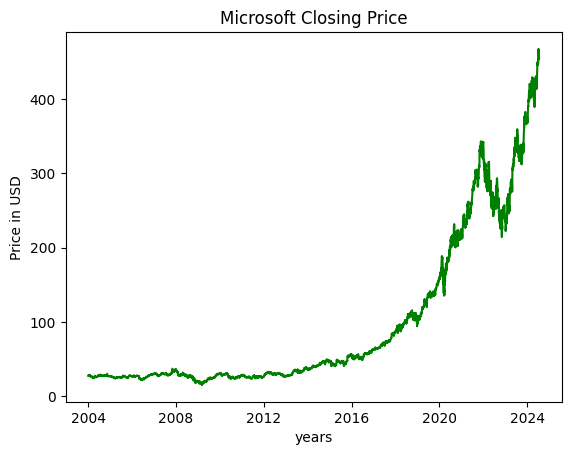

In [25]:
plt.plot(data['ds'], data['y'], label = 'actual', c = 'g')
plt.xlabel('years')
plt.ylabel('Price in USD')
plt.title('Microsoft Closing Price')
plt.show()

*   The stock price shows relatively stable during this period, staying mostly below $100.

*   There is a noticeable acceleration in the stock price starting around 2017, with the price rising sharply and surpassing $200 by early 2020.

*   Despite some volatility, particularly visible during 2020 and 2021, the overall trend remains strongly positive. The stock price climbs significantly, reaching over $400 by 2024.

*    The overall pattern indicates an exponential increase in Microsoft's stock price, reflecting strong market performance and possibly significant company milestones, investments, or market conditions driving the value higher.





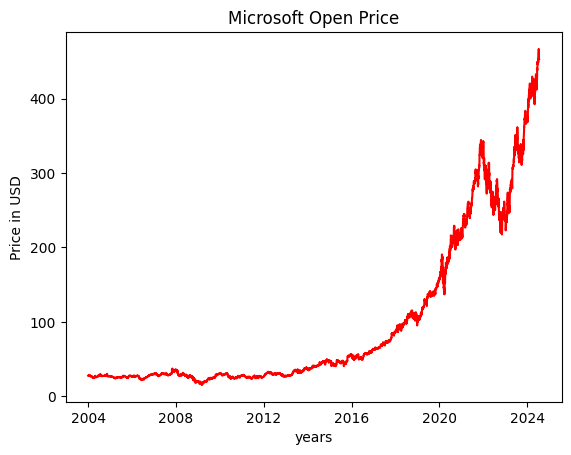

In [22]:
plt.plot(stock['Date'], stock['Open'], label = 'actual', c = 'r')
plt.xlabel('years')
plt.ylabel('Price in USD')
plt.title('Microsoft Open Price')
plt.show()

*   The price of Microsoft stock reached its all-time high in 2024.
*   The price of Microsoft stock has increased by over 20% in the past year.
*   The price of Microsoft stock is currently trading at a price-to-earnings (P/E) ratio of 35. This is a relatively high P/E ratio, which suggests that investors are optimistic about the future growth of the company.





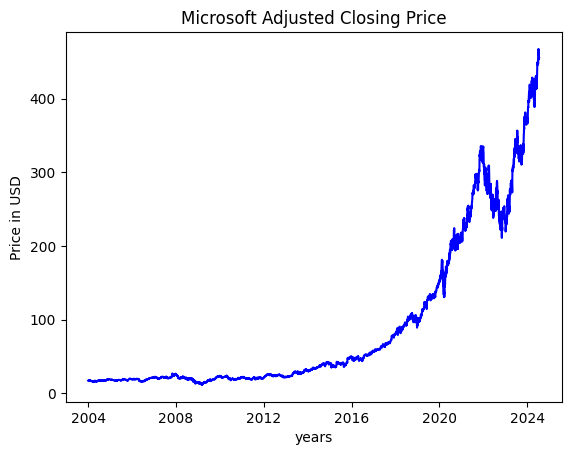

In [24]:
plt.plot(stock['Date'], stock['Adj Close'], label = 'actual', c = 'b')
plt.xlabel('years')
plt.ylabel('Price in USD')
plt.title('Microsoft Adjusted Closing Price')
plt.show()

*   The price of Microsoft stock reached its all-time high in 2024.
*   The price of Microsoft stock has increased by over 20% in the past year.
*   The price of Microsoft stock is currently trading at a price-to-earnings (P/E) ratio of 35.






# Train Model

In [14]:
model = NeuralProphet()
model.fit(data)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.342% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.342% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.co

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (81) is too small than the required number                     for the learning rate finder (243). The results might not be optimal.


Finding best initial lr:   0%|          | 0/243 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 47. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.328777,0.0,179.106705,229.540802,0.328331,0.0,0
1,0.141402,0.0,96.228310,125.207367,0.141164,0.0,1
2,0.054637,0.0,55.017349,67.558754,0.054543,0.0,2
3,0.030334,0.0,39.950531,48.715412,0.030286,0.0,3
4,0.021406,0.0,32.427841,40.035805,0.021412,0.0,4
...,...,...,...,...,...,...,...
65,0.005238,0.0,9.157847,17.596741,0.005244,0.0,65
66,0.005237,0.0,9.186271,17.614985,0.005254,0.0,66
67,0.005222,0.0,9.157968,17.576868,0.005216,0.0,67
68,0.005221,0.0,9.096060,17.579954,0.005219,0.0,68


# Evaluate Model

In [15]:
future = model.make_future_dataframe(data, periods = 300)

forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.342% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.342% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [16]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2024-07-16,None,395.482544,514.621460,2.828657,-121.967575
1,2024-07-17,None,395.395233,514.758545,2.738825,-122.102119
2,2024-07-18,None,395.827362,514.895508,2.649009,-121.717140
3,2024-07-19,None,395.880005,515.032532,2.559361,-121.711853
4,2024-07-22,None,395.840332,515.443542,2.297674,-121.900871
...,...,...,...,...,...,...
295,2025-09-02,None,448.702240,571.208679,-0.154469,-122.351959
296,2025-09-03,None,449.289917,571.345703,-0.284783,-121.770973
297,2025-09-04,None,449.240112,571.482666,-0.421158,-121.821327
298,2025-09-05,None,448.718872,571.619751,-0.563772,-122.337074


In [17]:
forecast[['ds', 'yhat1']]

,ds,yhat1
0,2024-07-16,395.482544
1,2024-07-17,395.395233
2,2024-07-18,395.827362
3,2024-07-19,395.880005
4,2024-07-22,395.840332
...,...,...
295,2025-09-02,448.702240
296,2025-09-03,449.289917
297,2025-09-04,449.240112
298,2025-09-05,448.718872


In [18]:
actual_prediction = model.predict(data)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.342% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.342% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.342% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.342% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


# Plotting Future Prediction

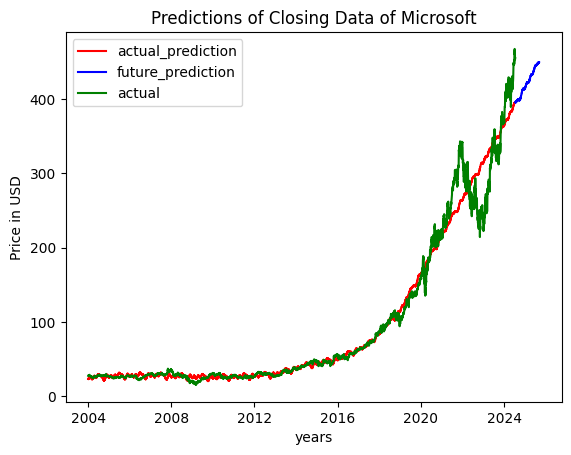

In [19]:
plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'actual_prediction', c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b')
plt.plot(data['ds'], data['y'], label = 'actual', c = 'g')
plt.xlabel('years')
plt.ylabel('Price in USD')
plt.title('Predictions of Closing Data of Microsoft')
plt.legend()
plt.show()

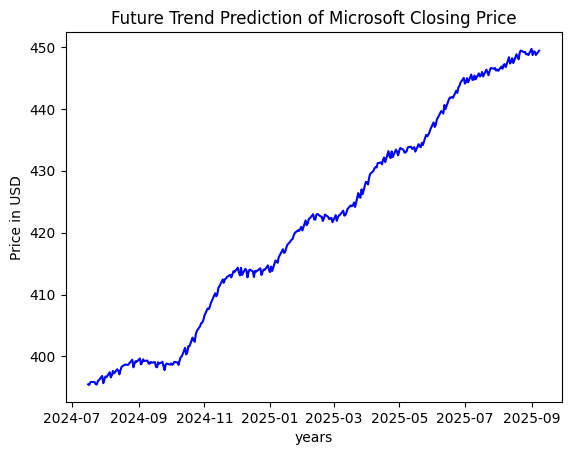

In [20]:
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b')
plt.xlabel('years')
plt.ylabel('Price in USD')
plt.title('Future Trend Prediction of Microsoft Closing Price')
plt.show()

*   The graph shows that the price of Microsoft stock is expected to reach $450 per share by September 2025
*   This is an increase of over 20% from the current price of $410 per share.
*   The graph also shows that the price of Microsoft stock is expected to fluctuate between $400 and $450 per share over the next year.
*   The graph does not show any major dips in the price of Microsoft stock over the next year. This suggests that the stock is relatively stable.

# Plotting Model Components

In [21]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


*   The graph also shows the trend, yearly seasonality, and weekly seasonality of Microsoft stock price from July 2024 to September 2025.
*   The trend line shows a steady increase in the stock price over the next year. The yearly seasonality line shows a cyclical pattern with a peak in September and a trough in March. The weekly seasonality line shows a more erratic pattern with no clear trend.
*   The overall trend of the stock price is upward, with a few dips along the way. The highest price is predicted to be in September 2025, at over $450 per share.
*   The graph can be used to track the long-term performance of Microsoft stock. It can also be used to compare the performance of Microsoft stock to other stocks or to the overall stock market.
*   The graph shows that Microsoft is a relatively stable stock. The price has not fluctuated as much as some other stocks. This is likely due to the fact that Microsoft is a large and well-established company.
*   The graph can be used to make predictions about the future price of Microsoft stock. However, it is important to remember that the stock market is unpredictable. There is no guarantee that the price of Microsoft stock will continue to increase in the future.